In [15]:
import time
import numpy as np
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def normalize (x):# 单位化向量
  norm=math.sqrt(sum(e**2 for e in x))
  return x / norm


def sign (a):# 符号函数
  if a>0 :
    return 1
  elif a<0:
    return -1
  else: 
    return 0


# 对超过边界的变量进行去除
def Bounds(s,Lb,Ub):
    temp = s
    for i in range(len(s)):
        if temp[i]<Lb:
            temp[i]=Lb
        elif temp[i]>Ub:
            temp[i]=Ub

    return temp


def fun (input):# 测试函数（目标为求得函数最小值，此函数极值点为 0）
  x=input[0]
  y=input[1]
  result =-20*np.exp(-0.2*np.sqrt((x*x+y*y)/2))-np.exp((np.cos(2*np.pi*x)+np.cos(2*np.pi*y))/2)+20+np.exp(1)
#  result=20+x**2+y**2-10*(math.cos(2*math.pi*x)+math.cos(2*math.pi*y))
#  print(result)
  return result


# 展示测试函数3维曲面图
#fig = plt.figure()  #定义新的三维坐标轴
#ax3 = plt.axes(projection='3d')

#定义三维数据坐标
# xx = np.arange(-5,5,0.5)    #起点-5，重点5，间隔0.5
# yy = np.arange(-5,5,0.5)
#网格化处理
# X, Y = np.meshgrid(xx, yy)

#作图
#lambda:输入x，y输出他们的值     map：使用 lambda 匿名函数
#ax3.plot_surface(X,Y,np.array(list(map(lambda x,y:20*(x**2-y**2)**2-(1-y)**2-3*(1+y)**2+0.3,X,Y))) ,cmap='rainbow')
#ax3.plot_surface(X,Y,np.array(list(map(lambda x,y:-20*np.exp(-0.2*np.sqrt((x*x+y*y)/2))-np.exp((np.cos(2*np.pi*x)+np.cos(2*np.pi*y))/2)+20+np.exp(1),X,Y))) ,cmap='rainbow')
#plt.show()


time_start=time.time ()# 计时器


############初始化各类参数##########
eta=0.95 #步长调整比例
iter=50 #迭代次数
step=1 #初始搜索步长
d0=5 #触须间距
dim=2 #变量维数
xl=0 #左触须坐标
xr=0 #右触须坐标
pop=10  #天牛个数

P_percent=0.2    # 探索者的人口规模占总人口规模的20%
pNum = round(pop*P_percent)  #round函数用来返回一个浮点数的四舍五入值


lb=-5  #测试函数上界
ub=5  #测试函数下界
X = np.zeros((pop,dim))  # 生成pop*dim的全0矩阵，代表天牛位置
fit = np.zeros((pop,1))   # 适应度值初始化
for i in range(pop):
    X[i,:] = lb+(ub-lb)*np.random.rand(1,dim)  # 随机初始化天牛位置
    fit[i,0] = fun(X[i,:])  # 初始化最佳适应度值

pFit = fit  #最佳适应度矩阵
pX = X  # 最佳种群位置
fMin = np.min(fit[:,0]) # fMin表示全局最优适应值  #返回最优解
bestI = np.argmin(fit[:,0])
bestX = X[bestI,:] # bestX表示fMin对应的全局最优位置的变量信息  #返回最优位置

Convergence_curve = np.zeros((1,iter))  # 初始化收敛曲线
#############################
    
    
    
    
allmin=10086 #记录全部的最小值


for t in range (iter):#开始迭代
    sortIndex = np.argsort(pFit.T)  # 对天牛的适应度值进行排序，返回其下标
    ########探索者位置更新/前20%优秀的人#############
    for i in range(pNum):   
        dir=np.random.rand(dim)#随机单位向量（头朝向）
        dir=normalize(dir)#归一化
        xl=X[sortIndex[0,i],:]+d0*dir/2
        xr=X[sortIndex[0,i],:]-d0*dir/2
        fl=fun(xl)
        fr=fun(xr)
        X[sortIndex[0,i],:]=X[sortIndex[0,i],:]-step*dir*sign(fl-fr)#找最小值所以是减
        X[sortIndex[0,i],:] = Bounds(X[sortIndex[0,i],:],lb,ub)  # 对超过边界的变量进行去除
        fit[sortIndex[0,i],0] = fun(X[sortIndex[0,i],:])   # 算新的适应度值
        
        bestII = np.argmin(fit[:,0])  #返回本轮适应度最优（最小）下标
        bestXX = X[bestII,:]  #对应位置  #为了后文头朝向
    ####################################
    
    #########跟随者位置更新#############
    for ii in range(pop-pNum):
        i = ii+pNum
        if i > pop/2:   #适应度最差的一波
            #r2 = np.random.rand(1) # 预警值
            
            step1=1  #专属步长
            dir=np.random.rand(dim)#随机单位向量（头朝向）
            dir=normalize(dir)#归一化
            xl=X[sortIndex[0,i],:]+d0*dir/2
            xr=X[sortIndex[0,i],:]-d0*dir/2
            fl=fun(xl)
            fr=fun(xr)
            X[sortIndex[0,i],:]=X[sortIndex[0,i],:]-step1*dir*sign(fl-fr)#找最小值所以是减
            
            
        else:   #适应度中间/固定头朝向为当前最优
            dir=normalize(bestXX)
            xl=X[sortIndex[0,i],:]+d0*dir/2
            xr=X[sortIndex[0,i],:]-d0*dir/2
            fl=fun(xl)
            fr=fun(xr)
            X[sortIndex[0,i],:]=X[sortIndex[0,i],:]-step*dir*sign(fl-fr)#找最小值所以是减
        X[sortIndex[0,i],:] = Bounds(X[sortIndex[0,i],:],lb,ub)  # 对超过边界的变量进行去除
        fit[sortIndex[0,i],0] = fun(X[sortIndex[0,i],:])   # 算新的适应度值
    ####################################
    
    for i in range(pop):
        if fit[i,0] < pFit[i,0]:
            pFit[i,0] = fit[i,0]
            pX[i,:] = X[i,:]
        if pFit[i,0] < fMin:
            fMin = pFit[i,0]
            bestX = pX[i,:]
            
    Convergence_curve[0,t] = fMin
    step*=eta
    
    

print('最优值=',fMin)
print('最优位置=',bestX)

time_end=time.time()
print('time cost',time_end-time_start,'s')


[ 3.26026459 -2.34054266]
[-2.3616108  -2.34691946]
[ 3.54553014 -0.09890646]
[ 1.269182   -5.32540917]
[ 2.60791299 -0.44657596]
[-1.66649654 -1.62802019]
[ 2.65452075 -3.13620238]
[ 0.2998849  -5.24589254]
[ 1.78999347 -1.02190861]
[0.97597325 2.3595765 ]
[ 3.53446069 -2.66111745]
[ 0.59406019 -4.04424852]
[ 0.84619087 -1.35241829]
[0.29641118 1.62595848]
[ 1.32950954 -3.36666881]
[ 3.89260055 -1.7274495 ]
[ 1.09431675 -0.38369049]
[-0.68134529  1.41621512]
[ 2.1112989  -2.74312619]
[ 3.19461195 -2.44355838]
[ 0.30658365 -0.99970718]
[0.31788302 1.45549334]
[ 1.25710139 -3.26307486]
[ 3.71576018 -1.59009219]
[-0.34373303  0.57470329]
[-0.42926974  0.79084098]
[ 0.34105365 -3.6641441 ]
[ 3.74068247 -0.5904028 ]
[-0.96975714 -0.05051113]
[0.47236246 0.89446759]
[ 0.55665384 -2.68766238]
[ 2.75501102 -0.75907937]
[-0.58110926  0.51503031]
[-0.52524853  0.82538561]
[ 2.27837809 -1.63818179]
[ 1.05159814 -1.81873768]
[0.11441259 1.23353526]
[-0.83604598 -0.12509056]
[ 0.18196757 -2.312440

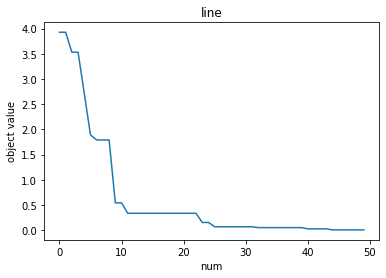

In [13]:
#收敛曲线
thr1=np.arange(len(Convergence_curve[0,:]))
plt.plot(thr1, Convergence_curve[0,:])
plt.xlabel('num')
plt.ylabel('object value')
plt.title('line')
plt.show()